<a href="https://colab.research.google.com/github/agustin-ammazzagatti/iris-classification/blob/main/Entrega_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TRABAJO PRACTICO N° 1 - DATASET IRIS

# Acerca del conjunto de datos

Incluye tres especies de iris con 50 muestras cada una, así como algunas propiedades de cada flor. Una especie de flor es linealmente separable de las otras dos, pero las otras dos no lo son entre sí.

Las columnas de este conjunto de datos son:

- Longitud del sépalo en cm
- Ancho del sépalo en cm
- Longitud del pétalo en cm
- Ancho del pétalo en cm
- Especies

# Consignas

Utilizando el conjunto de datos de 'iris' (https://www.kaggle.com/datasets/uciml/iris), tomando como ejemplo el notebook de la clase 09 (EDA) y lo aprendido en el resto de clases hasta el momento, realizar para la clase 14 (lunes 10/03/2025):



1.   Análisis exploratorio de datos (EDA)
2.   Feature engineering
3.   Documentar brevemente el código en comentarios de Python y los hallazgos dentro de celdas con formato Markdown.
4.  Breve presentación durante la clase (máximo 15 min).


Aclaración:
El objetivo de la actividad no es evaluarlos individualmente en términos de nota, si no mas bien, darle un cierre a lo visto hasta el momento antes de continuar con modelos de machine learning y, por tanto que ustedes puedan ponerlo en practica en un conjunto de datos nuevo.


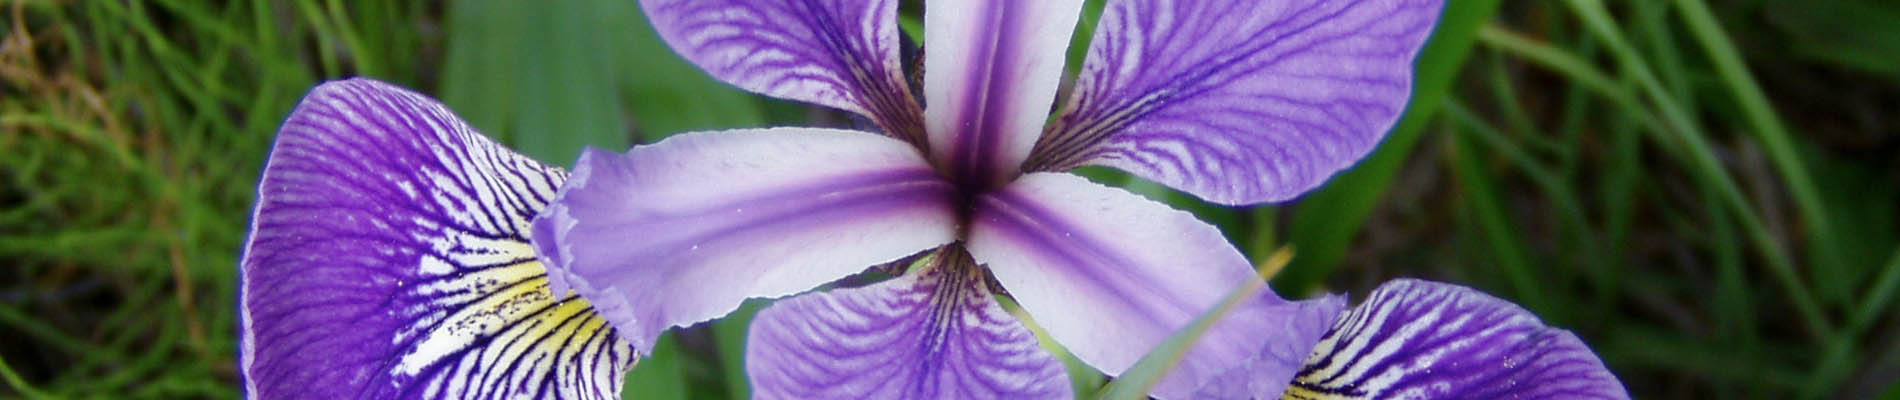

# Análisis exploratorio de datos (EDA)

El análisis exploratorio de datos es el proceso de explorar, limpiar, visualizar y resumir un conjunto de datos para entender sus patrones, distribuciones y relaciones entre variables antes de aplicar modelos.

Objetivos del EDA:


*  Comprender la estructura y las características de los datos.

* Detectar valores atípicos (outliers) y datos faltantes (missing values).
* Evaluar correlaciones y relaciones entre variables.
* Guiar el proceso de selección y preparación de datos para el modelado.

En Python el EDA involucra:

### Comprensión inicial de los datos

* Examinar la estructura: `df.shape`, `df.info()`
* Visualizar primeras filas: `df.head()`, `df.tail()`
* Estadísticas descriptivas: `df.describe()`
* Evaluar valores faltantes: `df.isnull().sum()`


### Análisis univariante (una variable a la vez)

* Distribuciones: histogramas, densidad (`plt.hist()`, `sns.distplot()`)
* Estadísticas: media, mediana, desviación estándar (`df['columna'].mean()`)
* Detección de outliers: boxplots (`sns.boxplot()`)
*  Conteo de valores para variables categóricas (`df['columna'].value_counts()`)


### Análisis bivariante (relaciones entre dos variables)

* Correlaciones: matrices de correlación, coeficientes de Pearson (`df.corr(), sns.heatmap()`)
* Gráficos de dispersión para variables numéricas (`sns.scatterplot()`)
* Gráficos de barras agrupadas para categóricas (`sns.barplot()`)
* Análisis de tendencias en el tiempo (`sns.lineplot()`)


### Análisis multivariante (relaciones entre múltiples variables)

* Pairplots (`sns.pairplot()`)
* Gráficos de facetas (`sns.FacetGrid()`)
* Mapas de calor agrupados

In [ ]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Leyendo la documentacion de Seaborn aparece que el dataset Iris está incluido, entonces lo puedo cargar directamente desde ahí.

https://seaborn.pydata.org/generated/seaborn.load_dataset.html

https://github.com/mwaskom/seaborn-data

In [ ]:
# Carga dataset Iris
df = sns.load_dataset('iris')

## Comprensión inicial de los datos

In [ ]:
# Mostrar las primeras 5 filas del dataset
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# Mostrar las últimas 5 filas del dataset
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [ ]:
# Mostrar de forma aleatoria 5 filas del dataset
df.sample(5, random_state=42) # como una forma de "bloquear" la aleatoriedad, asegurando que siempre obtenga los mismos resultados aleatorios cuando ejecuta el mismo código

,sepal_length,sepal_width,petal_length,petal_width,species
73,6.1,2.8,4.7,1.2,versicolor
18,5.7,3.8,1.7,0.3,setosa
118,7.7,2.6,6.9,2.3,virginica
78,6.0,2.9,4.5,1.5,versicolor
76,6.8,2.8,4.8,1.4,versicolor


In [ ]:
# Información general del dataset (cantidad filas/columnas, tipos de datos, valores faltantes)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Podemos ver que hay 4 columnas con variables numéricas de tipo "float64" y una columna "species" cuyo valor es de tipo "object".

In [ ]:
# Estadística descriptiva de las variables numéricas
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Listado de las columnas del dataset
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
# Cantidad de filas y columnas del dataset
df.shape

(150, 5)

In [ ]:
# Verificar si hay valores faltantes (nulos) en el dataset
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


No hay valores nulos en ninguna de las columnas.

Las separamos en variables numéricas y categóricas:

Numéricas (para obtener medidas de resumen de manera directa: tendencia central, dispersion, etc.):

- sepal_length
- sepal_width
- petal_length
- petal_width

Categóricas:
- species



## Distribución de cada variable numérica

Usamos histogramas para ver cómo se distribuyen las medidas de sépalo y pétalo.

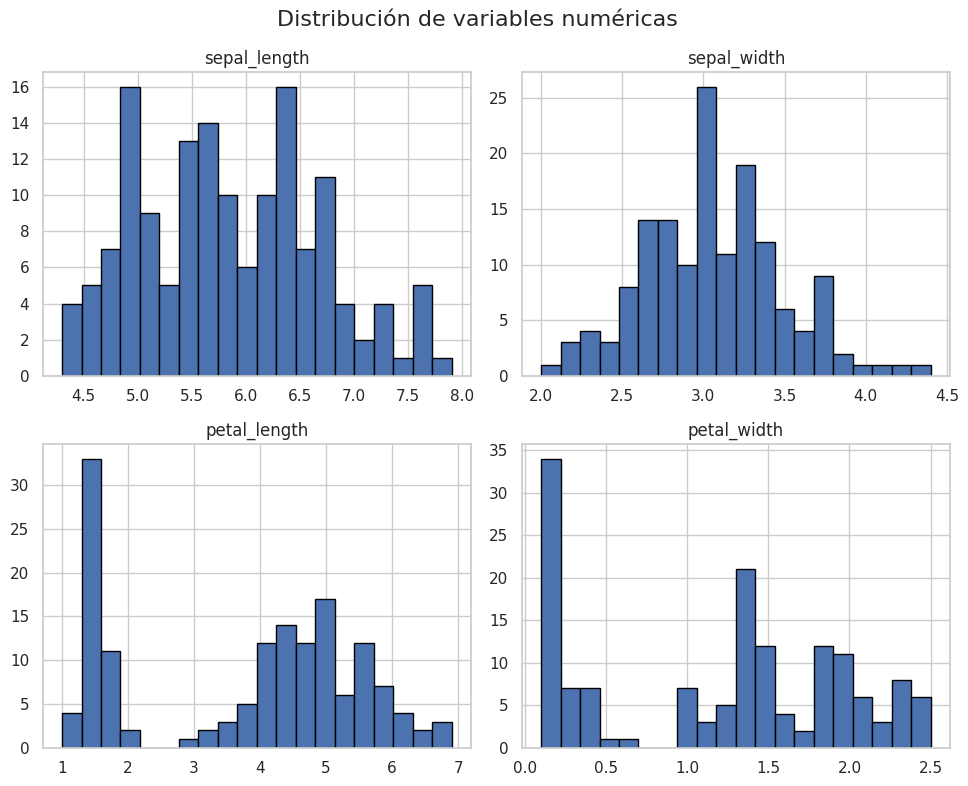

In [ ]:
# Histogramas

# Estilo de gráficos
sns.set(style="whitegrid")

# Crear histogramas de todas las variables numéricas
df.hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.suptitle("Distribución de variables numéricas", fontsize=16)
plt.tight_layout()
plt.show()

### 🔍 Análisis exploratorio: Distribución de variables numéricas

A continuación se detallan las observaciones realizadas a partir de los histogramas de las variables numéricas:

#### ✅ `sepal_length`
- Distribución algo uniforme, con varios picos (no unimodal).
- Rango aproximado: 4.5 a 8.0.
- No se observan valores atípicos evidentes.
- Puede no ser útil por sí sola para separar especies.

#### ✅ `sepal_width`
- Distribución centrada, levemente asimétrica, con forma cercana a una normal.
- Rango: 2.0 a 4.5.
- Aparecen algunos valores extremos en ambos extremos del rango.
- Puede presentar bastante solapamiento entre especies.

#### ✅ `petal_length`
- Distribución claramente **bimodal o trimodal**, con grupos bien separados.
- Un grupo concentrado cerca de 1.5, otro entre 4.0–5.5, y otro entre 6.0–7.0.
- Muy útil para separar especies.

#### ✅ `petal_width`
- Distribución **multimodal**, con tres agrupamientos: cerca de 0.2, cerca de 1.3 y uno más disperso.
- Evidencia de que una especie tiene pétalos notablemente más angostos que las otras.
- Variable altamente discriminante.

---

### 💡 Conclusión general

- Las variables de **pétalos (`petal_length` y `petal_width`)** son claramente más útiles para diferenciar especies.
- Las variables de **sépalo (`sepal_length` y `sepal_width`)** presentan mayor solapamiento.
- Este patrón es consistente con la descripción original del dataset, donde se menciona que una especie es linealmente separable de las otras dos.


## Análisis de variables categóricas

Lo importante de este dataset es que la información la podemos agrupar por ESPECIES. Entonces el siguiente bloque de código extrae la información de las especies del conjunto de datos Iris, cuenta las apariciones de cada especie y luego muestra estos recuentos para que se vea cuántas flores de cada especie están presentes en el conjunto de datos. Esto permite entender la distribución de las especies dentro del conjunto de datos.

In [ ]:
# Distribución de especies
df["species"].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


Vamos a generar un dataframe para cada especie, que se usarán en el analisis multivariado. Con el metodo .unique() detecto los valores diferentes en la columna "species".

In [ ]:
df["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Creo 3 variables (`df_setosa, df_versicolor, df_virginica`) que contiene información solo sobre las flores de esas especies. Esto permite un análisis posterior centrado únicamente en esta especie específica.

In [ ]:
mask = df["species"] == "setosa" # defino una máscara

df_setosa = df.loc[mask]
df_setosa

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [ ]:
mask = df["species"] == "versicolor" # defino una máscara

df_versicolor = df.loc[mask]
df_versicolor

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
55,5.7,2.8,4.5,1.3,versicolor
56,6.3,3.3,4.7,1.6,versicolor
57,4.9,2.4,3.3,1.0,versicolor
58,6.6,2.9,4.6,1.3,versicolor
59,5.2,2.7,3.9,1.4,versicolor


In [ ]:
mask = df["species"] == "virginica" # defino una máscara

df_virginica = df.loc[mask]
df_virginica

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica
105,7.6,3.0,6.6,2.1,virginica
106,4.9,2.5,4.5,1.7,virginica
107,7.3,2.9,6.3,1.8,virginica
108,6.7,2.5,5.8,1.8,virginica
109,7.2,3.6,6.1,2.5,virginica


## Visualización de datos "species"

Veamos un gráfico de conteo para especies.

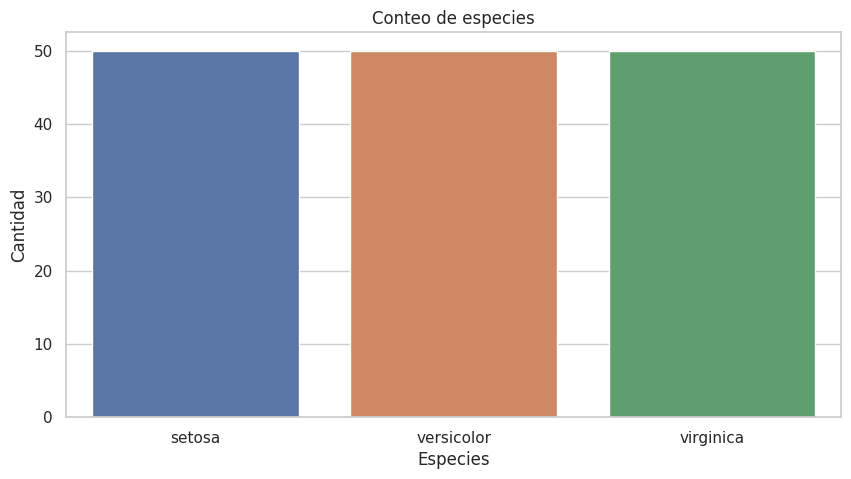

In [ ]:
fig = plt.figure(figsize=(10,5))

ax = sns.countplot(x="species", data=df, hue="species")
ax.set_title("Conteo de especies")
ax.set_ylabel("Cantidad")
ax.set_xlabel("Especies")

plt.show()

Vemos que la totalidad de 150 registros se distribuye de forma uniforme en cada especie (50 en c/u)

## Relación entre variables

Veamos la relación longitud vs ancho del sépalo, y la relación longitud vs ancho del pétalo.

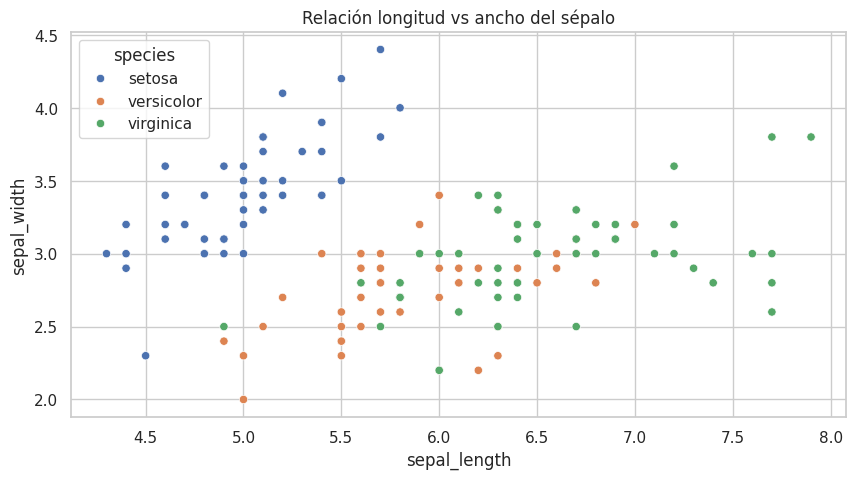

In [ ]:
# Gráfico relación longitud vs ancho del sépalo
fig = plt.figure(figsize=(10,5))
ax = sns.scatterplot(x="sepal_length", y="sepal_width", data=df, hue="species")
ax.set_title("Relación longitud vs ancho del sépalo")
plt.show()

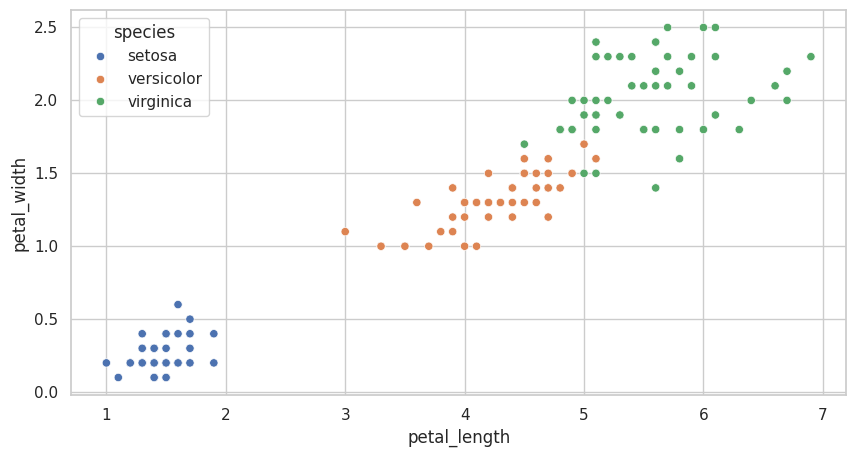

In [ ]:
# Gráfico relación longitud vs ancho del pétalo
fig = plt.figure(figsize=(10,5))
sns.scatterplot(x="petal_length", y="petal_width", data=df, hue="species")
ax.set_title("Relación longitud vs ancho del pétalo")
plt.show()

### 🔗 Análisis de relaciones entre variables

Se analizaron dos combinaciones de variables numéricas usando gráficos de dispersión, coloreando los puntos por especie:

---

#### 🔸 Relación entre `sepal_length` y `sepal_width`

- **Setosa** muestra una clara agrupación en la región superior izquierda (sépalos cortos y anchos).
- **Versicolor** y **virginica** se solapan más, con valores intermedios y largos en longitud del sépalo.
- La separación entre especies no es del todo clara solo con estas dos variables, aunque **setosa sí se distingue del resto**.
- Existe una ligera correlación negativa entre `sepal_length` y `sepal_width`.

---

#### 🔸 Relación entre `petal_length` y `petal_width`

- Se observa una **separación clara entre las tres especies**:
  - **Setosa** se agrupa en la esquina inferior izquierda (pétalos cortos y estrechos).
  - **Versicolor** ocupa una región intermedia.
  - **Virginica** aparece en la parte superior derecha (pétalos más largos y anchos).
- Las especies están bien diferenciadas en este espacio, especialmente **setosa**, que está completamente separada.
- Hay una **fuerte correlación positiva** entre `petal_length` y `petal_width`.

---

### 💡 Conclusión

- Las variables de **pétalo** no solo tienen más poder discriminante de manera individual (como se vio en los histogramas), sino también en combinación.
- Las variables de **sépalo** permiten distinguir claramente a *setosa*, pero no son tan efectivas para separar *versicolor* de *virginica*.


Ahora vamos a graficar todas las relaciones de las columnas mediante un diagrama de pares, esto es un análisis multivariado.

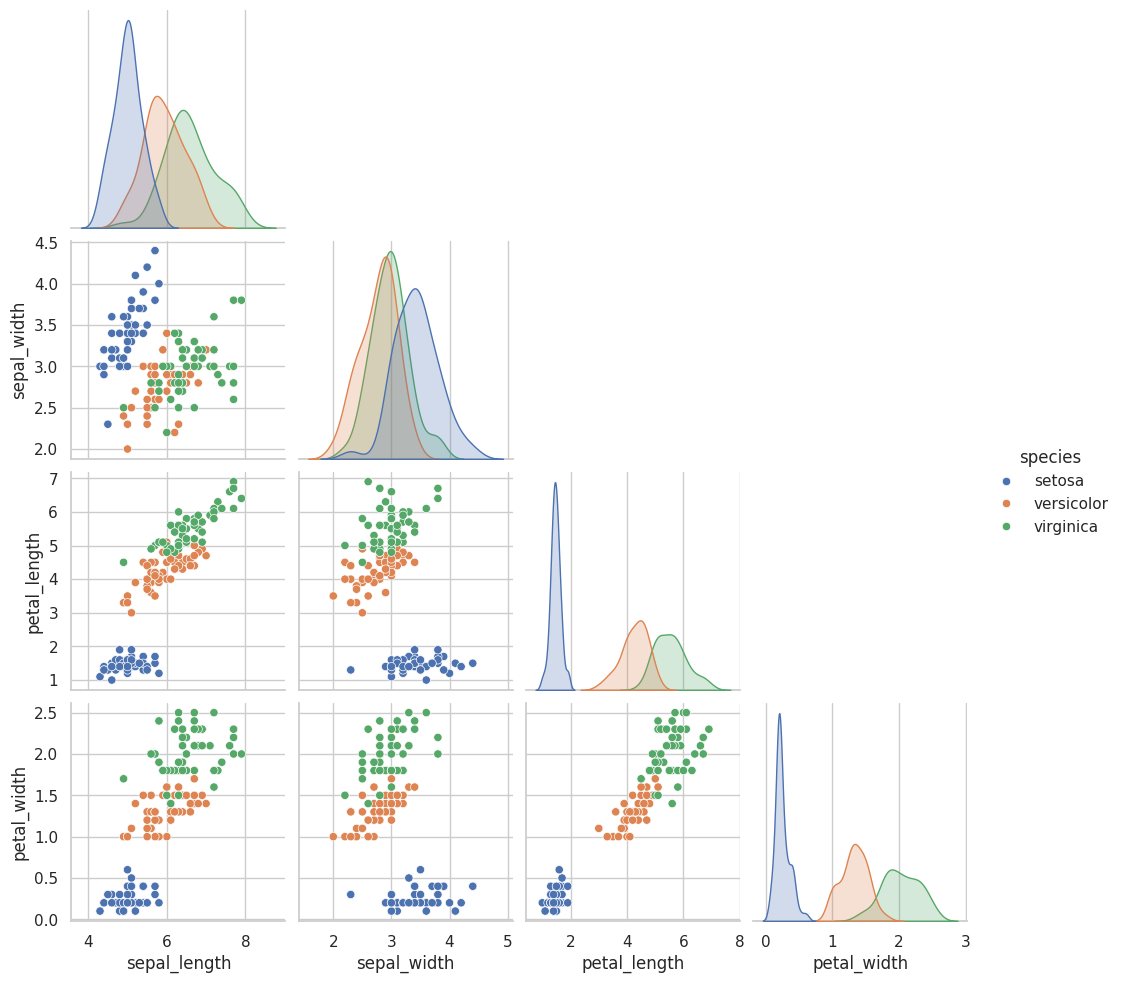

In [ ]:
sns.pairplot(data=df, hue='species', corner=True)
plt.show()

Diagramas de caja y bigote

Los diagramas de caja y bigote me sirven para ver cómo se distribuye el valor categórico con otros valores numéricos.

Este bloque de código genera cuatro diagramas de caja en una cuadrícula de 2x2, que permite ver la distribución de la longitud y ancho del sépalo, y la longitud y el ancho del pétalo para cada una de las especies: `setosa, versicolor, virginica`.
Podemos ver una visualización útil para entender la tendencia central (mediana), la dispersión (rango intercuartil) y los outliers del dataset

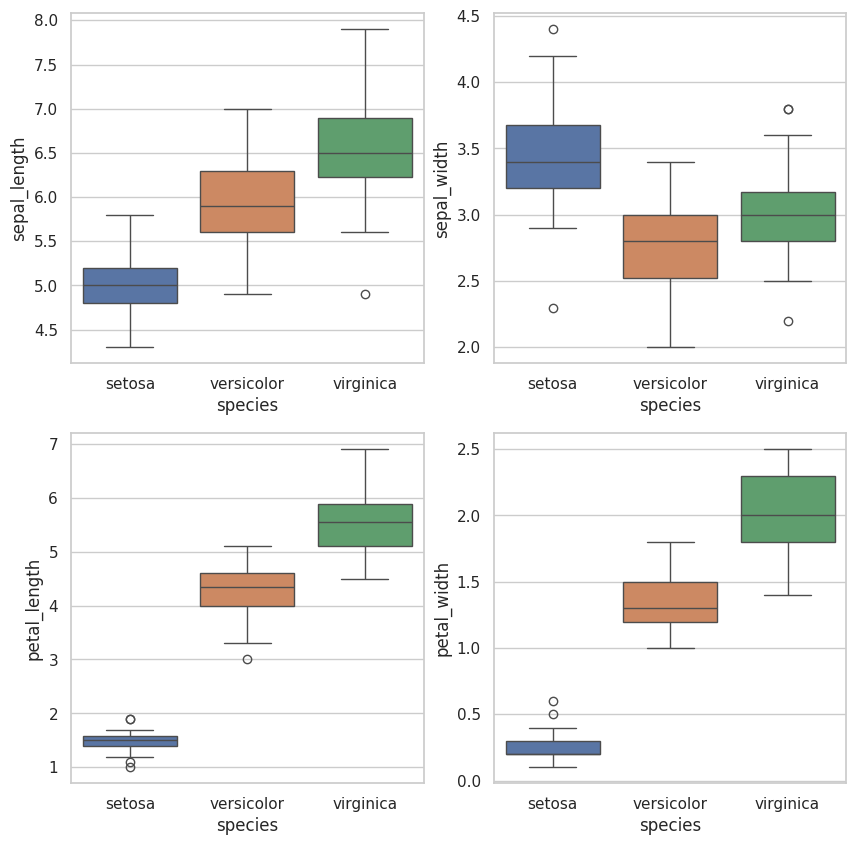

In [ ]:
# subplot crea una visualización de diagrama de caja dentro de una figura más grande que está diseñada previamente (figure)
# para contener múltiples diagramas.
# "plt.subplot(2, 2, 1)": Esta línea utiliza la función matplotlib.pyplot.subplot para definir
# la posición del diagrama actual dentro de la cuadrícula.
# "2, 2": Significa que la figura se dividirá en una cuadrícula de 2x2, lo que crea espacio para cuatro subgráficos en total.
# "1": Indica que el siguiente diagrama (sns.boxplot) se colocará en la primera posición de esta cuadrícula (la esquina superior izquierda).
# sns.boxplot(x="species", y="sepal_length", data=df): Esta línea crea el diagrama de caja real utilizando la biblioteca seaborn.

plt.figure(figsize=(10,10))

plt.subplot(2,2,1) # para crear subgráficos dentro de una figura principal
sns.boxplot(x="species", y="sepal_length", data=df, hue="species")

plt.subplot(2,2,2)
sns.boxplot(x="species", y="sepal_width", data=df, hue="species")

plt.subplot(2,2,3)
sns.boxplot(x="species", y="petal_length", data=df, hue="species")

plt.subplot(2,2,4)
sns.boxplot(x="species", y="petal_width", data=df, hue="species")

plt.show()

### 📦 Análisis de distribución por especie (Boxplots)

A continuación se analizan los boxplots de las variables numéricas agrupadas por especie:

---

#### ✅ `sepal_length`
- Las tres especies tienen distribuciones bien diferenciadas.
- **Setosa** tiene los sépalos más cortos, **virginica** los más largos.
- Hay cierto solapamiento entre **versicolor** y **virginica**, pero aún así muestran diferencias en sus medianas.

---

#### ✅ `sepal_width`
- **Setosa** tiene sépalos más anchos en promedio.
- **Versicolor** presenta menor mediana y mayor variabilidad.
- Hay más solapamiento entre especies en esta variable, especialmente entre **versicolor** y **virginica**.
- Se observan algunos outliers en los extremos.

---

#### ✅ `petal_length`
- Las tres especies están claramente separadas.
- **Setosa** tiene pétalos cortos, con valores cercanos a 1.5.
- **Virginica** tiene los pétalos más largos, con una mediana cercana a 5.5.
- Muy buena variable para discriminar entre especies.

---

#### ✅ `petal_width`
- Se observa una separación nítida entre las tres especies.
- **Setosa** tiene pétalos muy angostos (valores entre 0.1 y 0.6).
- **Virginica** tiene los pétalos más anchos.
- Es la variable con mayor poder discriminante junto con `petal_length`.

---

### 💡 Conclusión general

- Las variables de **pétalo (`petal_length`, `petal_width`)** son claramente útiles para clasificar las especies: muestran diferencias marcadas y sin solapamiento.
- Las variables de **sépalo (`sepal_length`, `sepal_width`)** permiten distinguir *setosa* del resto, pero tienen más solapamiento entre *versicolor* y *virginica*.
- **No hay valores atípicos importantes**, excepto algunos pocos puntos extremos en `sepal_width` y `petal_width`.



Verifiquemos esto viendo las estadísticas de cada especie:


In [ ]:
df_setosa.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000


In [ ]:
df_versicolor.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [ ]:
df_virginica.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


## EXTRA Feature engineering

En esta sección quiero ver como varían los caracteres florales, según las especies de iris. Para ello, primero voy a tener que codificar la variable categórica "species" para convertirla en numérica para luego hacer la correlación.

Utilizamos el codificar Label Encoder ya que asigna un número entero a cada categoría (ejemplo: setosa=0, versicolor=1, virginica=2). Esto tiene sentido en este contexto porque las especies tienen un orden "implícito" en la clasificación, y para correlaciones simples puede servir.

No es recomendable utilizar One Hot Encoder porque generaría columnas separadas (binarias) y la correlación no es tan directa.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# lo instanciamos
le = LabelEncoder()

# entrenamiento
le.fit(df["species"]) # entreno el codificador para la variable "species"

LabelEncoder()

In [ ]:
# transformación
df["species_cod"] = le.transform(df["species"]) # transformo los valores de la columna "species" con su respectivo código

In [ ]:
df["species_cod"].unique() # verifico que se haya codificado correctamente

array([0, 1, 2])

In [ ]:
df.sample(n=5, random_state=42) # muestreo aleatorio

,sepal_length,sepal_width,petal_length,petal_width,species,species_cod
73,6.1,2.8,4.7,1.2,versicolor,1
18,5.7,3.8,1.7,0.3,setosa,0
118,7.7,2.6,6.9,2.3,virginica,2
78,6.0,2.9,4.5,1.5,versicolor,1
76,6.8,2.8,4.8,1.4,versicolor,1


In [ ]:
# creación de dataframe con correlaciones entre variables
df_corr = df.corr(method="kendall", numeric_only=True)
df_corr

,sepal_length,sepal_width,petal_length,petal_width,species_cod
sepal_length,1.000000,-0.076997,0.718516,0.655309,0.670444
sepal_width,-0.076997,1.000000,-0.185994,-0.157126,-0.337614
petal_length,0.718516,-0.185994,1.000000,0.806891,0.822911
petal_width,0.655309,-0.157126,0.806891,1.000000,0.839687
species_cod,0.670444,-0.337614,0.822911,0.839687,1.000000


<Axes: >

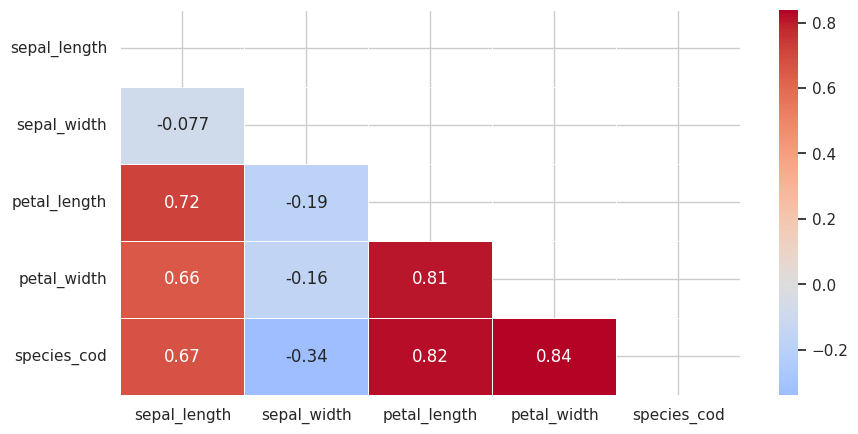

In [ ]:
# gráfico de correlación entre variables heatmap
# utilizando los métodos "np.triu" y "np.ones_like" para crear una matriz booleana

mask = np.triu(np.ones_like(df_corr, dtype=bool))

f, ax = plt.subplots(figsize=(10, 5))

sns.heatmap(data=df_corr, mask=mask, cmap='coolwarm', center=0,
            square=False, linewidths=.5, annot=True)

Comparando la variable Especies con el resto de las variables, podemos ver:

Una correlación más alta:
- Especie vs Ancho de Pétalo (0.84)
- Especie vs Largo de Pétalo (0.82)

Una correlación más débil:
- Especie vs Largo de Sépalo (0.67)

No hay correlación:
- Especie vs Largo de Sépalo (-0.33)

### 🔍 Análisis de Correlación entre Variables del Dataset Iris

- La correlación entre `species_cod` y las variables numéricas es alta y positiva con `petal_length` (0.82) y `petal_width` (0.84), lo que indica que estas dimensiones del pétalo están fuertemente relacionadas con la especie.
- También hay una correlación positiva moderada con `sepal_length` (0.67) y una correlación negativa moderada con `sepal_width` (-0.34).
- En general, las variables relacionadas con el tamaño del pétalo tienen la mayor influencia para diferenciar las especies en este dataset.
- La correlación negativa con `sepal_width` sugiere que a medida que las especies avanzan en el orden codificado, el ancho del sépalo tiende a disminuir.

Este análisis es consistente con lo esperado en la literatura, donde el tamaño del pétalo es un fuerte indicador para distinguir las especies de Iris.
